# Credit Card Default Data

### Description:
The dataset contains information on default payments, demographics, credit data, history of payment, and bill statements of credit card clients in India from October 2018 to March 2019.

### Usage
Default

### Format
A data frame with ~4200 observations on the following 25 variables

***ID***: ID of each client

***LIMIT_BAL***: Amount of given credit in INR (includes individual and family/supplementary credit

***FICO***: Bureau Scor/Credit Score (Ranges from 300 to 900)

***EDUCATION***: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

***MARRIAGE***: Marital status (1=married, 2=single, 3=others)

***AGE***: Age in years

***SEX***: Male/Female

***PAY_1***: Repayment status in March, 2019 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 
8=payment delay for eight months, 9=payment delay for nine months and above)

***PAY_2***: Repayment status in February, 2019 (scale same as above)

***PAY_3***: Repayment status in January, 2019 (scale same as above)

***BILL_AMT4***: Amount of bill statement in December, 2018 (INR)

***BILL_AMT5***: Amount of bill statement in November, 2018 (INR)

***BILL_AMT6***: Amount of bill statement in October, 2018 (INR)

***PAY_AMT4***: Amount of previous payment in December, 2018 (INR)

***PAY_AMT5***: Amount of previous payment in November, 2018 (INR)

***PAY_AMT6***: Amount of previous payment in October, 2018 (INR)

***default***: Default payment in next month (1=yes, 0=no)



#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

#### Importing the dataset

In [2]:
Default = pd.read_csv('CreditCardDefault.csv')

#Glimpse of Data
Default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pay%1,Pay%2,Pay%3,default,FICO
0,4,50000.0,2,2,1,37,28314.0,28959,29547,1111.0,1169.0,1111,0.04,0.04,0.04,0,MT700
1,15,250000.0,1,1,2,29,59696.0,56875,55512,3111.0,3111.0,3111,0.05,0.05,0.06,0,MT700
2,17,20000.0,1,1,2,24,18338.0,17915,19114,1.0,1651.0,1,0.00,0.09,0.00,1,LT500
3,18,320000.0,1,1,1,49,71174.0,5856,195599,21111.0,195599.0,51111,0.30,33.40,0.26,0,MT700
4,21,130000.0,2,3,2,39,21616.0,11812,931,2111.0,931.0,33764,0.10,0.08,36.27,0,MT700


#### Fixing messy column names (containing % sign) for ease of use

In [3]:
Default.columns = Default.columns.str.replace('%', '_')

#### Checking top 5 rows again

In [4]:
Default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pay_1,Pay_2,Pay_3,default,FICO
0,4,50000.0,2,2,1,37,28314.0,28959,29547,1111.0,1169.0,1111,0.04,0.04,0.04,0,MT700
1,15,250000.0,1,1,2,29,59696.0,56875,55512,3111.0,3111.0,3111,0.05,0.05,0.06,0,MT700
2,17,20000.0,1,1,2,24,18338.0,17915,19114,1.0,1651.0,1,0.00,0.09,0.00,1,LT500
3,18,320000.0,1,1,1,49,71174.0,5856,195599,21111.0,195599.0,51111,0.30,33.40,0.26,0,MT700
4,21,130000.0,2,3,2,39,21616.0,11812,931,2111.0,931.0,33764,0.10,0.08,36.27,0,MT700


#### First, let us check the number of rows (observations) and the number of columns (variables).

In [5]:
print('The number of rows (observations) is',Default.shape[0],'\n''The number of columns (variables) is',Default.shape[1])

The number of rows (observations) is 4246 
The number of columns (variables) is 17


#### Data types of all variables

In [6]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4246 entries, 0 to 4245
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         4246 non-null   int64  
 1   LIMIT_BAL  4246 non-null   float64
 2   SEX        4246 non-null   int64  
 3   EDUCATION  4246 non-null   int64  
 4   MARRIAGE   4246 non-null   int64  
 5   AGE        4246 non-null   int64  
 6   BILL_AMT4  4246 non-null   float64
 7   BILL_AMT5  4246 non-null   int64  
 8   BILL_AMT6  4246 non-null   int64  
 9   PAY_AMT4   4246 non-null   float64
 10  PAY_AMT5   4246 non-null   float64
 11  PAY_AMT6   4246 non-null   int64  
 12  Pay_1      4246 non-null   float64
 13  Pay_2      4246 non-null   float64
 14  Pay_3      4246 non-null   float64
 15  default    4246 non-null   int64  
 16  FICO       4246 non-null   object 
dtypes: float64(7), int64(9), object(1)
memory usage: 564.0+ KB


In [7]:
Default.duplicated().sum()

0

In [8]:
Default.drop('ID', axis = 1, inplace = True)

#### Converting data type of Gender, Education & Marriage to Object as they are character variables

In [9]:
Default["SEX"] = Default["SEX"].astype('object')
Default["EDUCATION"] = Default["EDUCATION"].astype('object')
Default["MARRIAGE"] = Default["MARRIAGE"].astype('object')

#### Rechecking Data types of all variables

In [10]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4246 entries, 0 to 4245
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  4246 non-null   float64
 1   SEX        4246 non-null   object 
 2   EDUCATION  4246 non-null   object 
 3   MARRIAGE   4246 non-null   object 
 4   AGE        4246 non-null   int64  
 5   BILL_AMT4  4246 non-null   float64
 6   BILL_AMT5  4246 non-null   int64  
 7   BILL_AMT6  4246 non-null   int64  
 8   PAY_AMT4   4246 non-null   float64
 9   PAY_AMT5   4246 non-null   float64
 10  PAY_AMT6   4246 non-null   int64  
 11  Pay_1      4246 non-null   float64
 12  Pay_2      4246 non-null   float64
 13  Pay_3      4246 non-null   float64
 14  default    4246 non-null   int64  
 15  FICO       4246 non-null   object 
dtypes: float64(7), int64(5), object(4)
memory usage: 530.9+ KB


#### Now, let us check the basic measures of descriptive statistics for the continuous variables.

In [11]:
Default.describe()

,LIMIT_BAL,AGE,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pay_1,Pay_2,Pay_3,default
count,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000
mean,157117.286858,35.047574,57061.098917,53771.845973,51647.689590,5616.298398,5193.867640,5717.024494,0.566373,0.549659,0.681941,0.227037
std,130528.792785,9.110943,68727.390542,64368.227196,62985.909815,14647.382789,14114.021638,16549.440680,3.454705,3.953106,4.462142,0.418966
min,10000.000000,21.000000,511.000000,511.000000,511.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,13726.500000,12985.000000,11514.750000,1111.000000,1111.000000,911.000000,0.030000,0.040000,0.030000,0.000000
50%,120000.000000,33.000000,31130.500000,28922.500000,28138.000000,2136.000000,2111.000000,2111.000000,0.040000,0.050000,0.040000,0.000000
75%,230000.000000,41.000000,74406.750000,71826.500000,68806.500000,5111.000000,5111.000000,5111.000000,0.120000,0.140000,0.140000,0.000000
max,1000000.000000,73.000000,891586.000000,927171.000000,961664.000000,321118.000000,417991.000000,261111.000000,106.560000,129.650000,153.330000,1.000000


#### Now, let us check the basic measures of descriptive statistics for the categorical variables

In [12]:
Default["SEX"].value_counts()

2    2530
1    1716
Name: SEX, dtype: int64

In [13]:
Default["EDUCATION"].value_counts()

2    2109
1    1416
3     721
Name: EDUCATION, dtype: int64

In [14]:
Default["MARRIAGE"].value_counts()

2    2324
1    1861
3      58
0       3
Name: MARRIAGE, dtype: int64

In [15]:
#Clubbing the levels of Marital Status into Married vs. Single
Default["MARRIAGE"] = np.where(Default["MARRIAGE"] == 1, 1, 0)

In [16]:
Default["MARRIAGE"].value_counts()

0    2385
1    1861
Name: MARRIAGE, dtype: int64

In [17]:
Default["default"].value_counts()

0    3282
1     964
Name: default, dtype: int64

#### Checking proportion of default

In [18]:
Default["default"].value_counts(normalize = True)

0    0.772963
1    0.227037
Name: default, dtype: float64

#### Check for missing values

In [19]:
Default.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Pay_1        0
Pay_2        0
Pay_3        0
default      0
FICO         0
dtype: int64

There are no missing values in the dataset.

#### Getting Top 5 rows

In [20]:
Default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pay_1,Pay_2,Pay_3,default,FICO
0,50000.0,2,2,1,37,28314.0,28959,29547,1111.0,1169.0,1111,0.04,0.04,0.04,0,MT700
1,250000.0,1,1,0,29,59696.0,56875,55512,3111.0,3111.0,3111,0.05,0.05,0.06,0,MT700
2,20000.0,1,1,0,24,18338.0,17915,19114,1.0,1651.0,1,0.00,0.09,0.00,1,LT500
3,320000.0,1,1,1,49,71174.0,5856,195599,21111.0,195599.0,51111,0.30,33.40,0.26,0,MT700
4,130000.0,2,3,0,39,21616.0,11812,931,2111.0,931.0,33764,0.10,0.08,36.27,0,MT700


#### Eliminating redundant variables

In [21]:
#Since we already have Payment to Bill ratio variables, we can eliminate the Payment and Bill Amounts
Default = Default.drop(['BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis = 1)

In [22]:
Default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Pay_1,Pay_2,Pay_3,default,FICO
0,50000.0,2,2,1,37,0.04,0.04,0.04,0,MT700
1,250000.0,1,1,0,29,0.05,0.05,0.06,0,MT700
2,20000.0,1,1,0,24,0.00,0.09,0.00,1,LT500
3,320000.0,1,1,1,49,0.30,33.40,0.26,0,MT700
4,130000.0,2,3,0,39,0.10,0.08,36.27,0,MT700


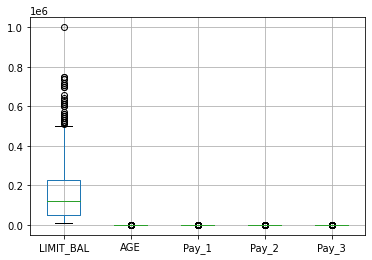

In [23]:
Default_num = Default[['LIMIT_BAL','AGE','Pay_1','Pay_2','Pay_3']]
Default_num.boxplot();

In [24]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [25]:
for column in Default_num.columns: 
    lr,ur=remove_outlier(Default_num[column])
    Default_num[column]=np.where(Default_num[column]>ur,ur,Default_num[column])
    Default_num[column]=np.where(Default_num[column]<lr,lr,Default_num[column])

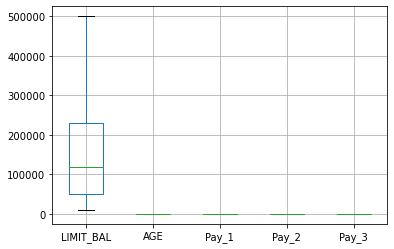

In [26]:
Default_num.boxplot();

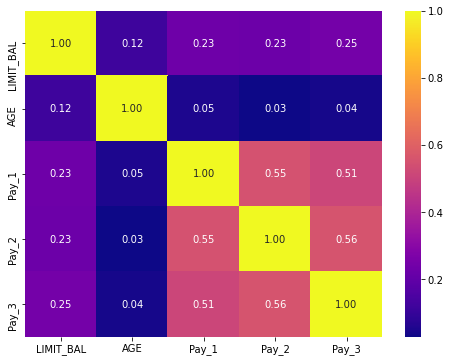

In [27]:
plt.subplots(figsize = (8,6))
sns.heatmap(Default_num[['LIMIT_BAL', 'AGE', 'Pay_1','Pay_2', 'Pay_3']] .corr(), annot = True, cmap = 'plasma', fmt = '.2f');

In [28]:
Default[['LIMIT_BAL', 'AGE', 'Pay_1','Pay_2', 'Pay_3']] = Default_num[['LIMIT_BAL', 'AGE', 'Pay_1','Pay_2', 'Pay_3']]

#### Creating dummy variables

In [29]:
default_dummy = pd.get_dummies(Default,drop_first=True)
default_dummy.head()

,LIMIT_BAL,MARRIAGE,AGE,Pay_1,Pay_2,Pay_3,default,SEX_2,EDUCATION_2,EDUCATION_3,FICO_MT700
0,50000.0,1,37.0,0.040,0.04,0.040,0,1,1,0,1
1,250000.0,0,29.0,0.050,0.05,0.060,0,0,0,0,1
2,20000.0,0,24.0,0.000,0.09,0.000,1,0,0,0,0
3,320000.0,1,49.0,0.255,0.29,0.260,0,0,0,0,1
4,130000.0,0,39.0,0.100,0.08,0.305,0,1,0,1,1


# Model Building using Logistic Regression for 'Probability at default'

## The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
# y = $\frac{1}{1 + {e^{-z}}}$

### Note: z  = $\beta_0$ +${\sum_{i=1}^{n}(\beta_i  X_1)}$

#### Now, Importing statsmodels modules

In [30]:
import statsmodels.formula.api as SM

#### Creating train & test datasets

In [31]:
X = default_dummy.drop(['default'], axis=1)
y = default_dummy['default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=142,stratify=default_dummy['default'])

In [32]:
#Statsmodel requires the labelled data, therefore, concatinating the y label to the train set.
Default_train = pd.concat([X_train,y_train], axis=1)
Default_test = pd.concat([X_test,y_test], axis=1)

#### Creating logistic regression equation & storing it in f_1

Lets check signifiance of variable 'Score' in a logistic regression model

#### Descriptive statistics of Target variable

In [33]:
Default_train["default"].value_counts()

0    2625
1     771
Name: default, dtype: int64

#### Checking if dataset is balanced

In [34]:
Default_train.default.sum() / len(Default_train.default)

0.22703180212014135

## Feature Selection

The optimal machine learning problem approach is to perform extensive EDA on dataset and understand properties of the predictors before even getting into training models on these variables. However, this is not always possible. Sometimes the dataset has lot many variables; sometimes even hundreds or even thousands of variables, which can quickly outrun human comprehension.

Feature selection is the process of tuning down the number of predictor variables used by the models you build.

For example, when faced with two models with the same or nearly the same score, but with the latter model using more variables, your immediate instinct should be to choose the one with fewer variables. That model is simpler to train, simpler to understand, easier to run, and less time consuming. 

Lets start with feature selection methods & validate them back using manual feature selection using backward elimination approach:

# Lets try & test features manually using backward elimination approach:

## Model 1

#### Logistic regression on 'default_smote' dataset

In [35]:
#Creating our first model using all variables
model_1 = SM.logit(formula = 'default ~ LIMIT_BAL + AGE + Pay_1 + Pay_2 + Pay_3 + SEX_2 + EDUCATION_2 + EDUCATION_3 + MARRIAGE + FICO_MT700', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.106699
         Iterations 12


#### Checking the coefficients

In [36]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3396
Model:                          Logit   Df Residuals:                     3385
Method:                           MLE   Df Model:                           10
Date:                Sun, 13 Jun 2021   Pseudo R-squ.:                  0.8008
Time:                        18:24:15   Log-Likelihood:                -362.35
converged:                       True   LL-Null:                       -1819.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3283      0.452      0.726      0.468      -0.558       1.214
LIMIT_BAL   -1.962e-06   9.04e-07     -2.169      0.030   -3.73e-06   -1.89e-07
AGE             0.0127      0.012      1.091      0.275      -0.010       0.036
Pay_1          -4.1752      1.203     -3.471      0.001      -6.533      -1.817
Pay_2          59.4760      5.758     10.329      0.000      48.190      70.762
Pay_3          -2.6873      0.974     -2.759      0.006      -4.596      -0.779
SEX_2          -0.3354      0.191     -1.752      0.080      -0.711       0.040
EDUCATION_2     0.1491      0.224      0.665      0.506      -0.291       0.589
EDUCATION_3    -0.0994      0.298     -0.334      0.738      -0.683       0.484
MARRIAGE        0.3759      0.218      1.721      0.085      -0.052       0.804
FICO_MT700    -21.4701      1.703    -12.611      0.000     -24.807     -18.133
===============================================================================

Possibly complete quasi-separation: A fraction 0.56 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Variable Education_3 has the highest p-value and is insignificant, therefore, we need to eliminate it.

## Model 2

In [37]:
model_2 = SM.logit(formula = 'default ~ LIMIT_BAL + AGE + Pay_1 + Pay_2 + Pay_3 + SEX_2 + EDUCATION_2 + MARRIAGE + FICO_MT700', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.106716
         Iterations 12


In [38]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3396
Model:                          Logit   Df Residuals:                     3386
Method:                           MLE   Df Model:                            9
Date:                Sun, 13 Jun 2021   Pseudo R-squ.:                  0.8008
Time:                        18:24:16   Log-Likelihood:                -362.41
converged:                       True   LL-Null:                       -1819.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3050      0.447      0.683      0.495      -0.571       1.181
LIMIT_BAL   -1.881e-06   8.71e-07     -2.160      0.031   -3.59e-06   -1.74e-07
AGE             0.0121      0.012      1.052      0.293      -0.010       0.035
Pay_1          -4.1716      1.202     -3.469      0.001      -6.528      -1.815
Pay_2          59.4057      5.750     10.332      0.000      48.136      70.675
Pay_3          -2.6857      0.974     -2.758      0.006      -4.594      -0.777
SEX_2          -0.3347      0.191     -1.748      0.080      -0.710       0.040
EDUCATION_2     0.1868      0.194      0.965      0.335      -0.193       0.566
MARRIAGE        0.3681      0.217      1.695      0.090      -0.058       0.794
FICO_MT700    -21.4470      1.700    -12.618      0.000     -24.778     -18.115
===============================================================================

Possibly complete quasi-separation: A fraction 0.56 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Now, Education_2 has the highest p-value and is insignificant, therefore, we need to eliminate it.

In [39]:
model_3 = SM.logit(formula = 'default ~ LIMIT_BAL + AGE + Pay_1 + Pay_2 + Pay_3 + SEX_2 + MARRIAGE + FICO_MT700', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.106853
         Iterations 12


In [40]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3396
Model:                          Logit   Df Residuals:                     3387
Method:                           MLE   Df Model:                            8
Date:                Sun, 13 Jun 2021   Pseudo R-squ.:                  0.8005
Time:                        18:24:16   Log-Likelihood:                -362.87
converged:                       True   LL-Null:                       -1819.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4715      0.412      1.144      0.253      -0.336       1.279
LIMIT_BAL  -2.002e-06   8.61e-07     -2.326      0.020   -3.69e-06   -3.15e-07
AGE            0.0103      0.011      0.904      0.366      -0.012       0.032
Pay_1         -4.2433      1.200     -3.535      0.000      -6.596      -1.891
Pay_2         59.3243      5.736     10.342      0.000      48.082      70.567
Pay_3         -2.6853      0.973     -2.760      0.006      -4.592      -0.778
SEX_2         -0.3301      0.191     -1.727      0.084      -0.705       0.045
MARRIAGE       0.4020      0.214      1.875      0.061      -0.018       0.822
FICO_MT700   -21.4223      1.696    -12.632      0.000     -24.746     -18.098
==============================================================================

Possibly complete quasi-separation: A fraction 0.56 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Eliminating Age

In [41]:
model_4 = SM.logit(formula = 'default ~ LIMIT_BAL + Pay_1 + Pay_2 + Pay_3 + SEX_2 + MARRIAGE + FICO_MT700', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.106974
         Iterations 12


In [42]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3396
Model:                          Logit   Df Residuals:                     3388
Method:                           MLE   Df Model:                            7
Date:                Sun, 13 Jun 2021   Pseudo R-squ.:                  0.8003
Time:                        18:24:16   Log-Likelihood:                -363.28
converged:                       True   LL-Null:                       -1819.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7871      0.222      3.552      0.000       0.353       1.221
LIMIT_BAL  -1.912e-06   8.54e-07     -2.238      0.025   -3.59e-06   -2.37e-07
Pay_1         -4.2388      1.199     -3.535      0.000      -6.589      -1.889
Pay_2         59.1875      5.728     10.333      0.000      47.961      70.414
Pay_3         -2.6613      0.971     -2.741      0.006      -4.565      -0.758
SEX_2         -0.3452      0.190     -1.814      0.070      -0.718       0.028
MARRIAGE       0.4893      0.192      2.552      0.011       0.113       0.865
FICO_MT700   -21.3872      1.693    -12.630      0.000     -24.706     -18.068
==============================================================================

Possibly complete quasi-separation: A fraction 0.56 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Eliminating Gender

In [43]:
model_5 = SM.logit(formula = 'default ~ LIMIT_BAL + Pay_1 + Pay_2 + Pay_3 + MARRIAGE + FICO_MT700', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.107462
         Iterations 12


In [44]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3396
Model:                          Logit   Df Residuals:                     3389
Method:                           MLE   Df Model:                            6
Date:                Sun, 13 Jun 2021   Pseudo R-squ.:                  0.7994
Time:                        18:24:16   Log-Likelihood:                -364.94
converged:                       True   LL-Null:                       -1819.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6016      0.195      3.087      0.002       0.220       0.983
LIMIT_BAL  -1.877e-06   8.52e-07     -2.204      0.028   -3.55e-06   -2.08e-07
Pay_1         -4.3675      1.192     -3.663      0.000      -6.705      -2.030
Pay_2         58.7146      5.694     10.311      0.000      47.554      69.875
Pay_3         -2.6836      0.967     -2.776      0.006      -4.578      -0.789
MARRIAGE       0.4866      0.191      2.544      0.011       0.112       0.862
FICO_MT700   -21.2590      1.684    -12.626      0.000     -24.559     -17.959
==============================================================================

Possibly complete quasi-separation: A fraction 0.56 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Eliminating Gender varaible

Now all the variables are significant, therefore, we don't need to eliminate any variable.

## Prediction on the Data

Now, let us see the predicted probability values.

In [45]:
y_prob_pred_train = model_5.predict(Default_train)
y_prob_pred_train

275     7.891093e-09
294     9.999631e-01
1226    4.488807e-09
1656    1.487710e-08
1051    4.925653e-01
            ...     
2579    9.948083e-01
459     8.081906e-03
1001    3.582729e-08
3240    1.536724e-01
850     4.783709e-01
Length: 3396, dtype: float64

Let us now see the predicted classes

In [46]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

# Model Evaluation on the Training Data

Let us now check the confusion matrix and the classification report followed by the AUC and the AUC-ROC curve.

In [47]:
from sklearn import metrics

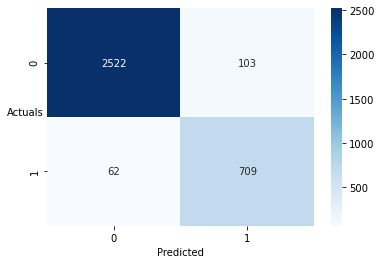

In [48]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

Let us now go ahead and print the classification report to check the various other parameters.

In [49]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.976     0.961     0.968      2625
           1      0.873     0.920     0.896       771

    accuracy                          0.951      3396
   macro avg      0.925     0.940     0.932      3396
weighted avg      0.953     0.951     0.952      3396



Overall 95% of correct predictions to total predictions were made by the model

92% of those defaulted were correctly identified as defaulters by the model

#### Now, let us see the predicted probability values on test dataset

In [50]:
y_prob_pred_test = model_5.predict(Default_test)
y_prob_pred_test

381     1.083660e-07
9       9.215232e-01
3819    9.968953e-01
661     1.454417e-08
1205    7.381772e-09
            ...     
3543    9.675319e-01
3980    6.046110e-09
1782    2.124131e-08
2042    9.998233e-01
3597    4.112107e-09
Length: 850, dtype: float64

Let us now see the predicted classes

In [51]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

# Model Evaluation on the Test Data

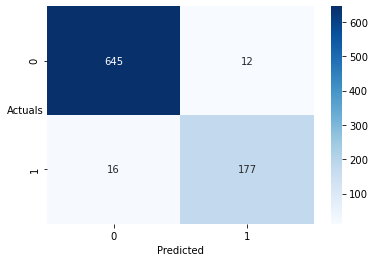

In [52]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

Let us now go ahead and print the classification report to check the various other parameters.

In [53]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.976     0.982     0.979       657
           1      0.937     0.917     0.927       193

    accuracy                          0.967       850
   macro avg      0.956     0.949     0.953       850
weighted avg      0.967     0.967     0.967       850



Overall 97% of correct predictions to total predictions were made by the model

91% of those defaulted were correctly identified as defaulters by the model

## END